In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
def System(r, t, w0=1., w=0.3):
    
    x, y, z, vx, vy, vz = r
    
    dxdt = vx
    dydt = vy
    dzdt = vz
    
    dvxdt = - w0*vy*np.sin(w*t)
    dvydt = w0*vz*np.sin(w*t)
    dvzdt = 0
    
    return [vx, vy, vz, dvxdt, dvydt, dvzdt]

In [58]:
N = 100
t = np.linspace(0,20,N)
r0 = (0,0,0, 0,1,1)

In [67]:
def Integrator2(f,r0,t):
    
    h = t[1] - t[0]
    
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    z = np.zeros_like(t)
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    vz = np.zeros_like(t)
    
    x[0] = r0[0]
    y[0] = r0[1]
    z[0] = r0[2]
    vx[0] = r0[3]
    vy[0] = r0[4]
    vz[0] = r0[5]
    
    K1 = np.zeros(6)
    K2 = np.zeros(6)
    
    # Las pendientes instantaneas
    R = np.zeros(6)

    for i in range(1,len(t)):
        
        R = np.array([x[i-1],y[i-1],z[i-1],vx[i-1],vy[i-1],vz[i-1]])
        
        K1 = f(R,t[i-1])
        
        R = np.array([x[i-1]+h*K1[0],y[i-1]+h*K1[1], z[i-1]+h*K1[2], vx[i-1]+h*K1[3],vy[i-1]+h*K1[4],vz[i-1]+h*K1[5]])
        
        K2 = f(R,t[i-1]+h)
        
        x[i] = x[i-1] + 0.5*h*(K1[0]+K2[0])
        y[i] = y[i-1] + 0.5*h*(K1[1]+K2[1])
        z[i] = y[i-1] + 0.5*h*(K1[2]+K2[2])
        
        vx[i] = vx[i-1] + 0.5*h*(K1[3]+K2[3])
        vy[i] = vy[i-1] + 0.5*h*(K1[4]+K2[4])
        vz[i] = vy[i-1] + 0.5*h*(K1[5]+K2[5])
        
    return x,y,z,vx,vy,vz

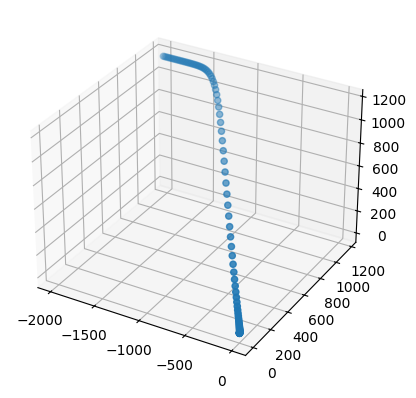

In [70]:
x,y,z,vx,vy,vz = Integrator2(System,r0,t)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)

In [33]:
def GetEuler2System(f0,f1,r0,v0,t): # dos funciones (eq diferenciales), vector con condiciones iniciales, tiempo
    h = t[1] - t[0]
    
    R1 = np.zeros_like(t)
    R2 = np.zeros_like(t)
    R3 = np.zeros_like(t)
    
    V1 = np.zeros_like(t)
    V2 = np.zeros_like(t)
    V3 = np.zeros_like(t)
    
    # condicion inicial
    R1[0] = r0[0]
    R2[0] = r0[1]
    R3[0] = r0[2]
    
    V1[0] = v0[1]
    V2[0] = v0[1]
    V3[0] = v0[1]
    
    # vectorizacion de las pendientes
    K1 = np.zeros(3)
    K2 = np.zeros(3)
    
    for i in range(1,len(t)):
        K1[0] = f0(S[i-1],I[i-1],t[i])
        K1[1] = f1(S[i-1],I[i-1],t[i])
        
        K2[0] = f0(S[i-1]+h*K1[0], I[i-1]+h*K1[1],beta,gamma)
        K2[1] = f1(S[i-1]+h*K1[0], I[i-1]+h*K1[1], beta,gamma)
        
        R1[i] = R1[i-1] + 0.5*h*(K1[0]+K2[0])
        R2[i] = R2[i-1] + 0.5*h*(K1[0]+K2[0])
        R3[i] = R3[i-1] + 0.5*h*(K1[0]+K2[0])
        
        V1[i] = V1[i-1] + 0.5*h*(K1[1]+K2[1])
        V2[i] = V2[i-1] + 0.5*h*(K1[1]+K2[1])
        V3[i] = V3[i-1] + 0.5*h*(K1[1]+K2[1])
    
    return np.array([R1,R2,R3]), np.array([V1,V2,V3]) 

In [35]:
S2_1, I2_1 = GetEuler2System(f0,f1,r0,v0,t)

NameError: name 'S' is not defined